# An analysis of watch imports/exports of 2024

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

In [2]:
FILE = 'myProject_4Data.csv'

In [3]:
data = read_csv(FILE, dtype={'cmdCode':str})

In [4]:
def watchType(c):
    if c == '9101':
        return 'Fancy Metal'
    else:
        return 'Standard'

COMMODITY = 'Type of Watch'
data[COMMODITY] = data['cmdCode'].apply(watchType)
MONTH = 'refPeriodId'
PARTNER = 'partnerDesc'
FLOW = 'flowDesc'
VALUE = 'primaryValue'

HEADINGS = [MONTH, PARTNER, COMMODITY, FLOW, VALUE]
cleanData = data[HEADINGS]
cleanData

,refPeriodId,partnerDesc,Type of Watch,flowDesc,primaryValue
0,20240101,World,Fancy Metal,Import,4.178852e+07
1,20240101,Australia,Fancy Metal,Import,8.576422e+03
2,20240101,Austria,Fancy Metal,Import,5.489469e+03
3,20240101,Belgium,Fancy Metal,Import,1.076434e+04
4,20240101,Canada,Fancy Metal,Import,6.055812e+03
...,...,...,...,...,...
2319,20241201,United Arab Emirates,Standard,Export,1.318393e+06
2320,20241201,Türkiye,Standard,Export,1.208221e+05
2321,20241201,USA,Standard,Export,6.189066e+06
2322,20241201,Zambia,Standard,Export,1.851718e+03


In [9]:
countries = cleanData[cleanData['partnerDesc'] != 'World']
imports = countries.groupby('flowDesc').get_group('Import')
exports = countries.groupby('flowDesc').get_group('Export')

# Total Trade Flows of Both Types of Watches

In [12]:
totalTrade =  DataFrame([(imports[VALUE].sum(), exports[VALUE].sum(), exports[VALUE].sum()-imports[VALUE].sum() )],columns=['Total Imports','Total Exports','Balance'])
totalTrade

,Total Imports,Total Exports,Balance
0,2.184111e+09,1.157181e+09,-1.026931e+09


# Main trade partners over the year

In [15]:
mainImports = imports.groupby(PARTNER)[VALUE].aggregate(sum).sort_values(ascending = False).head(8)
mainImports

partnerDesc
Switzerland             1.834867e+09
China                   1.318916e+08
China, Hong Kong SAR    5.868137e+07
Viet Nam                3.891365e+07
United Kingdom          2.627434e+07
Germany                 2.100646e+07
Japan                   1.590081e+07
Thailand                1.009935e+07
Name: primaryValue, dtype: float64

<Axes: title={'center': 'Main Exporters to the UK'}, ylabel='partnerDesc'>

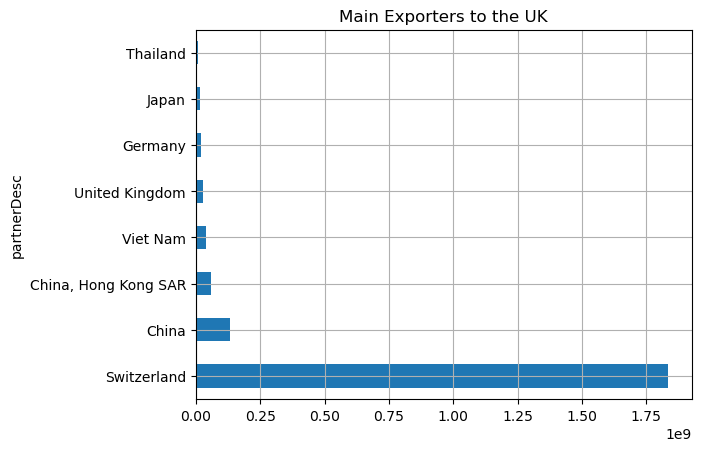

In [25]:
mainImports.plot(kind='barh', grid=True, title='Main Exporters to the UK')

In [19]:
mainExports = exports.groupby(PARTNER)[VALUE].aggregate(sum).sort_values(ascending = False).head(8)
mainExports

partnerDesc
China, Hong Kong SAR    3.920528e+08
Switzerland             2.510671e+08
USA                     1.514390e+08
Ireland                 6.566671e+07
United Arab Emirates    5.104813e+07
France                  3.571114e+07
Spain                   3.341481e+07
Germany                 2.542149e+07
Name: primaryValue, dtype: float64

<Axes: title={'center': 'Main Importers from the UK'}, ylabel='partnerDesc'>

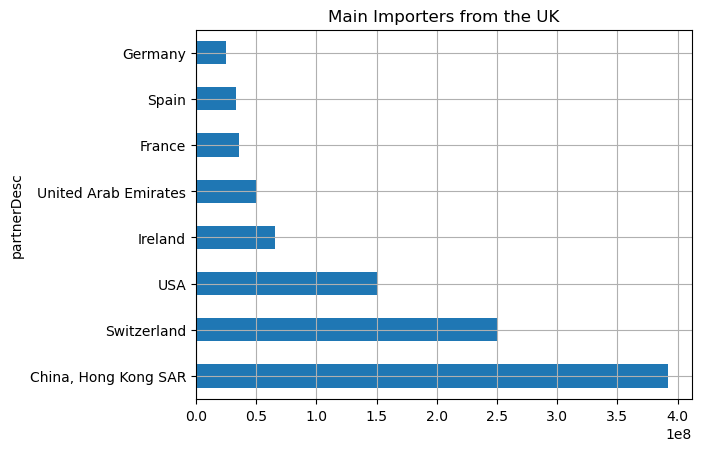

In [27]:
mainExports.plot(kind='barh', grid=True, title='Main Importers from the UK')

# Regular Fancy Watch Import Partners

In [72]:
def regular(g):
    return (len(g) >= 8)

fancyImports = imports.groupby(COMMODITY).get_group('Fancy Metal')
regFancy = fancyImports.groupby(PARTNER).filter(regular)
regFancyFreq = regFancy.groupby(PARTNER)[PARTNER].aggregate(len)
regFancyFreq.sort_values(ascending=False, inplace=True)
regFancyFreq

partnerDesc
Italy                   12
Japan                   12
United Arab Emirates    12
USA                     12
Switzerland             12
Netherlands             12
United Kingdom          12
Germany                 12
France                  12
China, Hong Kong SAR    12
China                   12
Ireland                 11
Spain                   10
Australia               10
India                    9
Malaysia                 9
Sweden                   9
Belgium                  8
Canada                   8
Name: partnerDesc, dtype: int64

In [135]:
January = 20240101

JanuaryRegularFancyImports = DataFrame(regFancy.groupby(MONTH).get_group(January))
TopJanuaryRegularFancyImports = JanuaryRegularFancyImports.sort_values(VALUE, ascending=False).head()
TopJanuaryRegularFancyImports

,refPeriodId,partnerDesc,Type of Watch,flowDesc,primaryValue
23,20240101,Switzerland,Fancy Metal,Import,3.809706e+07
8,20240101,France,Fancy Metal,Import,1.530433e+06
9,20240101,Germany,Fancy Metal,Import,6.838217e+05
10,20240101,"China, Hong Kong SAR",Fancy Metal,Import,1.962596e+05
27,20240101,USA,Fancy Metal,Import,1.633139e+05


In [133]:
print('The above regular partners accounted for',(fancyImports[fancyImports[PARTNER].isin(TopJanuaryRegularFancyImports[PARTNER])][VALUE].sum()/fancyImports[VALUE].sum()).round(4)*100,'% of fancy watch imports over the year')

The above regular partners accounted for 94.88 % of fancy watch imports over the year


# Bi-directional Partners

In [137]:
pivot = pivot_table(countries, 
                    index=PARTNER,
                    columns=[FLOW,COMMODITY],
                    values=VALUE,
                    aggfunc=sum,
                   margins=True)
pivot.dropna()

flowDesc                    Export                      Import                \
Type of Watch          Fancy Metal      Standard   Fancy Metal      Standard   
partnerDesc                                                                    
Australia             6.357455e+06  5.028411e+06  1.790622e+05  1.311286e+05   
Austria               1.128115e+06  6.299939e+05  6.683650e+04  3.681661e+05   
Belgium               1.649135e+05  4.577001e+06  1.113539e+05  3.920361e+05   
Bulgaria              1.637837e+04  3.765283e+05  1.058103e+04  2.757429e+04   
Canada                6.564551e+05  3.230606e+06  2.988389e+04  5.325923e+04   
Chile                 8.245418e+03  3.830488e+04  1.728599e+03  1.576497e+03   
China                 4.997680e+05  1.738963e+05  3.520256e+06  1.283714e+08   
China, Hong Kong SAR  2.383343e+08  1.537185e+08  3.350888e+06  5.533048e+07   
Cyprus                8.034874e+04  2.274231e+05  4.260563e+04  3.977137e+03   
Czechia               1.066599e+06  4.448547e+05  4.034327e+03  3.682735e+05   
Denmark               2.103958e+05  1.603847e+06  8.208503e+04  1.602228e+05   
Finland               5.194398e+04  1.548312e+05  9.147150e+03  1.067641e+04   
France                1.470780e+07  2.100334e+07  7.497000e+06  2.383814e+06   
Germany               1.110069e+07  1.432079e+07  1.318586e+07  7.820604e+06   
Gibraltar             1.081113e+05  7.057926e+04  2.519182e+03  2.550205e+03   
Greece                2.900897e+04  9.591368e+05  1.295452e+03  1.118343e+04   
Iceland               1.273716e+04  2.470506e+04  1.220111e+04  2.402773e+04   
India                 1.976602e+05  8.175584e+05  9.526116e+04  5.845845e+04   
Ireland               3.222565e+07  3.344105e+07  2.417923e+05  2.402711e+06   
Israel                4.829029e+04  4.388527e+05  3.910364e+04  3.306737e+04   
Italy                 5.162729e+06  7.313347e+06  1.301019e+06  3.307730e+06   
Japan                 1.613377e+06  2.068873e+06  6.519218e+05  1.524889e+07   
Kuwait                2.354490e+06  1.036069e+06  1.113640e+03  2.735124e+04   
Latvia                1.458320e+04  5.670983e+05  7.656642e+04  6.387881e+05   
Lithuania             4.159963e+04  3.187435e+04  1.384875e+04  3.393461e+05   
Luxembourg            4.133805e+04  9.769774e+04  3.548631e+03  1.179297e+03   
Malaysia              1.126184e+06  5.445035e+05  1.945568e+05  3.339430e+04   
Malta                 1.165724e+05  5.456619e+05  8.476371e+05  4.520462e+05   
Mexico                4.991102e+04  2.998706e+05  1.294766e+04  1.908162e+04   
Netherlands           3.555731e+06  5.045605e+06  1.477999e+06  9.795523e+05   
New Zealand           1.799654e+05  1.858834e+05  9.528009e+03  2.411038e+03   
Nigeria               1.782523e+06  5.929989e+05  2.145275e+04  1.696094e+04   
Other Asia, nes       1.631542e+05  4.347952e+05  1.040065e+05  1.687492e+06   
Poland                9.866207e+04  1.903998e+06  3.750305e+03  8.743492e+04   
Portugal              2.310765e+05  2.555369e+05  4.464980e+03  6.031452e+04   
Qatar                 1.807001e+07  7.194942e+06  1.610455e+03  3.196928e+04   
Rep. of Korea         1.980221e+05  1.937924e+05  1.289884e+03  5.848650e+04   
Romania               2.825848e+04  6.525476e+05  4.038392e+03  2.444048e+04   
Saudi Arabia          3.254046e+06  1.118291e+06  1.676782e+04  5.008517e+03   
Singapore             9.732651e+06  4.843743e+06  2.007483e+06  3.310429e+05   
Slovakia              2.298766e+04  5.001493e+04  2.522269e+04  1.321727e+05   
Slovenia              1.546263e+04  1.710843e+05  1.019395e+05  3.643130e+05   
South Africa          5.601547e+04  1.782081e+06  5.377724e+03  4.675547e+04   
Spain                 1.609885e+07  1.731596e+07  2.675204e+05  6.200563e+05   
Sweden                1.963378e+05  6.491802e+05  3.848901e+04  1.858572e+05   
Switzerland           1.612436e+08  8.982346e+07  7.154076e+08  1.119459e+09   
Thailand              2.357981e+06  3.277133e+05  5.338754e+06  4.760600e+06   


In [141]:
DataFrame(pivot.dropna().loc['Switzerland'])

Switzerland
flowDesc Type of Watch              
Export   Fancy Metal    1.612436e+08
         Standard       8.982346e+07
Import   Fancy Metal    7.154076e+08
         Standard       1.119459e+09
All                     2.085934e+09